# 1.0 Case Study: constructing a network of wikipedia pages

In [4]:
!pip install wikipedia

In [20]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.lines import Line2D
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns
import pandas as pd

In [4]:
nx.__version__

'3.1'

In [3]:
#Começando processo de geração da rede
#Página escolhida: https://pt.wikipedia.org/wiki/Isaac_Newton

SEED = "Engenharia de Computação".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

#store both the layer to which a node belongs and the node name together as a tuple 
#on the todo_lst list.

todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

#Gerando grafo g

g = nx.DiGraph()
layer, page = todo_lst[0]

#the main collection/construction loop of the project.

while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Engenharia De Computação
1 Americas
1 Coppe
1 Cidade Universitária (Rio De Janeiro)
1 Civil Engineering
1 Computer Engineering
1 Control Engineering
1 Electrical Engineering
1 Electronic Engineering
1 Eletrobras
1 Environmental Engineering
Could not load Environmental Engineering
1 Escola Nacional De Belas Artes
1 Federal University Of Rio De Janeiro
1 Instituto Militar De Engenharia
1 John Vi Of Portugal
Could not load John Vi Of Portugal
1 Latin America
1 Material Engineering
1 Mechanical Engineering
1 Metallurgical Engineering
1 National Faculty Of Law (Brazil)
1 Naval Engineering
1 Petrobras
1 Petroleum Engineering
1 Production Engineering
1 Rio De Janeiro
1 Ufrj


In [4]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

7852 nodes, 11320 edges


In [5]:
#Processo de limpeza

# make a copy of raw graph
original = g.copy()






In [6]:
# remove self loops

#Aqui removi o loop que verificava páginas com o nome no plural, visto que por ser nome de pessoa,
# não há plural

g.remove_edges_from(nx.selfloop_edges(g))

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Anglo-America', 'Anglo America'), ('Z-Transform', 'Z Transform'), ('Mass-Production', 'Mass Production'), ('Solid-State Physics', 'Solid State Physics'), ('Condensed-Matter Physics', 'Condensed Matter Physics'), ('Computer-Integrated Manufacturing', 'Computer Integrated Manufacturing')]


In [7]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

7846 nodes, 11311 edges


In [8]:
#Truncate the network

# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")


2095 nodes, 5560 edges


C:\Users\Caio\AppData\Local\Temp\ipykernel_9252\3897120094.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(cmap)


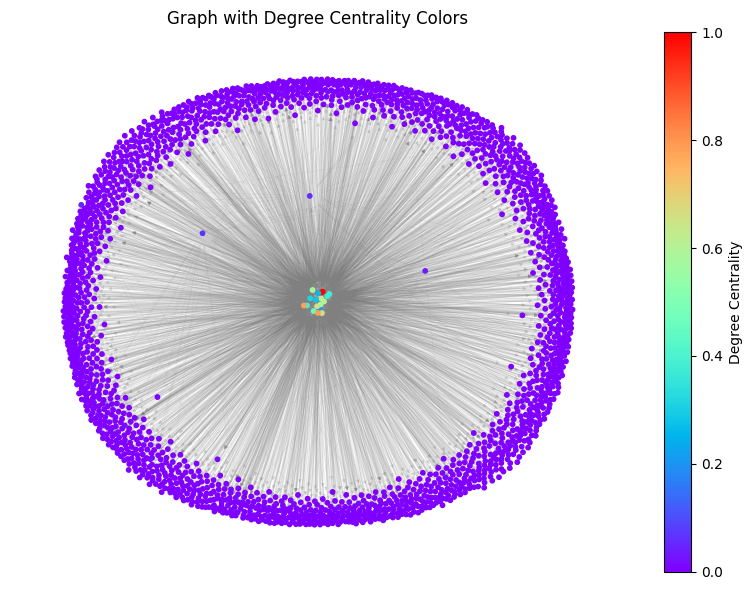

In [38]:
degree_centrality = nx.degree_centrality(gsub)

# Criar uma lista de cores proporcional à centralidade de grau
node_colors = [degree_centrality[node] for node in gsub.nodes]

# Calcular a disposição do grafo com o layout de mola (spring layout)
pos = nx.spring_layout(gsub, k = 0.8)

# Plotar o grafo com as cores dos nós proporcionais à centralidade de grau
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(gsub, pos, node_color=node_colors, cmap='rainbow', node_size=10)
nx.draw_networkx_edges(gsub, pos, edge_color='gray', alpha=0.1, arrowsize=5, width=0.5)
plt.title("Graph with Degree Centrality Colors")
plt.axis('off')

# Criar uma colorbar personalizada
cmap = plt.cm.ScalarMappable(cmap='rainbow')
cmap.set_array([])
colorbar = plt.colorbar(cmap)
colorbar.set_label('Degree Centrality')

plt.tight_layout()
plt.savefig('tentando.png',dpi=300)
plt.show()


C:\Users\Caio\AppData\Local\Temp\ipykernel_9252\1598165159.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(cmap)


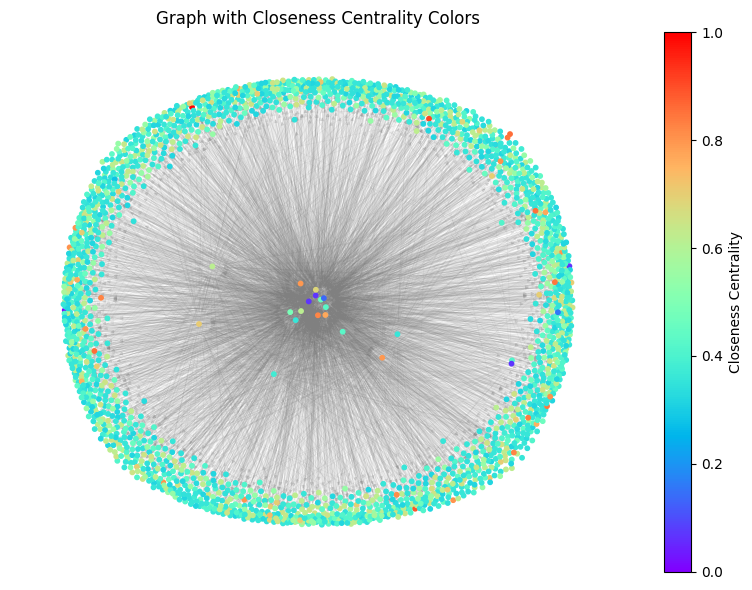

In [39]:
closeness_centrality = nx.closeness_centrality(gsub)

# Criar uma lista de cores proporcional à centralidade de grau
node_colors = [closeness_centrality[node] for node in gsub.nodes]

# Calcular a disposição do grafo com o layout de mola (spring layout)
pos = nx.spring_layout(gsub, k = 1.2)

# Plotar o grafo com as cores dos nós proporcionais
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(gsub, pos, node_color=node_colors, cmap='rainbow', node_size=10)
nx.draw_networkx_edges(gsub, pos, edge_color='gray', alpha=0.1, arrowsize=5, width=0.5)
plt.title("Graph with Closeness Centrality Colors")
plt.axis('off')

# Criar uma colorbar personalizada
cmap = plt.cm.ScalarMappable(cmap='rainbow')
cmap.set_array([])
colorbar = plt.colorbar(cmap)
colorbar.set_label('Closeness Centrality')

plt.tight_layout()
plt.savefig('Closeness_Centrality',dpi=300)
plt.show()

C:\Users\Caio\AppData\Local\Temp\ipykernel_9252\1755909775.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(cmap)


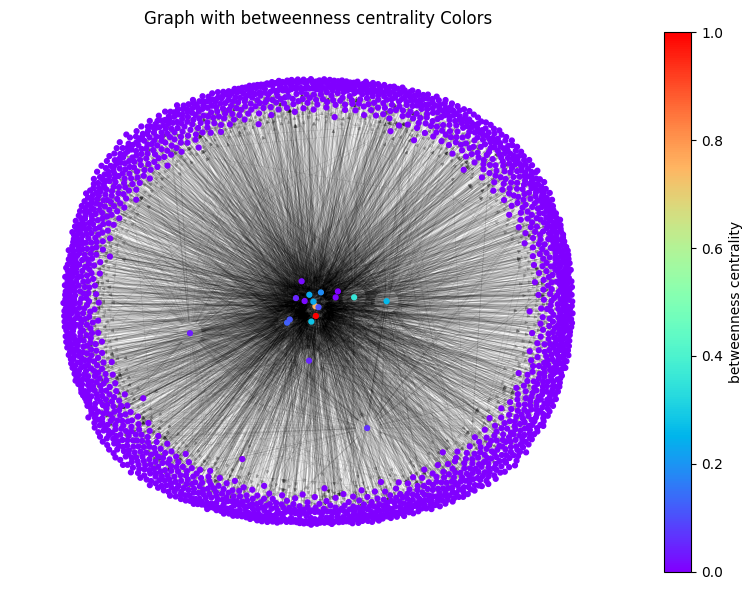

In [40]:
betweenness_centrality = nx.betweenness_centrality(gsub)

# Criar uma lista de cores proporcional à centralidade de grau
node_colors = [betweenness_centrality[node] for node in gsub.nodes]

# Calcular a disposição do grafo com o layout de mola (spring layout)
pos = nx.spring_layout(gsub, k = 1.2)

# Plotar o grafo com as cores dos nós proporcionais
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(gsub, pos, node_color=node_colors, cmap='rainbow', node_size=12)
nx.draw_networkx_edges(gsub, pos, edge_color='black', alpha=0.1, arrowsize=5, width=0.5)
plt.title("Graph with betweenness centrality Colors")
plt.axis('off')

# Criar uma colorbar personalizada
cmap = plt.cm.ScalarMappable(cmap='rainbow')
cmap.set_array([])
colorbar = plt.colorbar(cmap)
colorbar.set_label('betweenness centrality')

plt.tight_layout()
plt.savefig('betweenness_centrality.png',dpi=300)
plt.show()

C:\Users\Caio\AppData\Local\Temp\ipykernel_9252\2188455829.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(cmap)


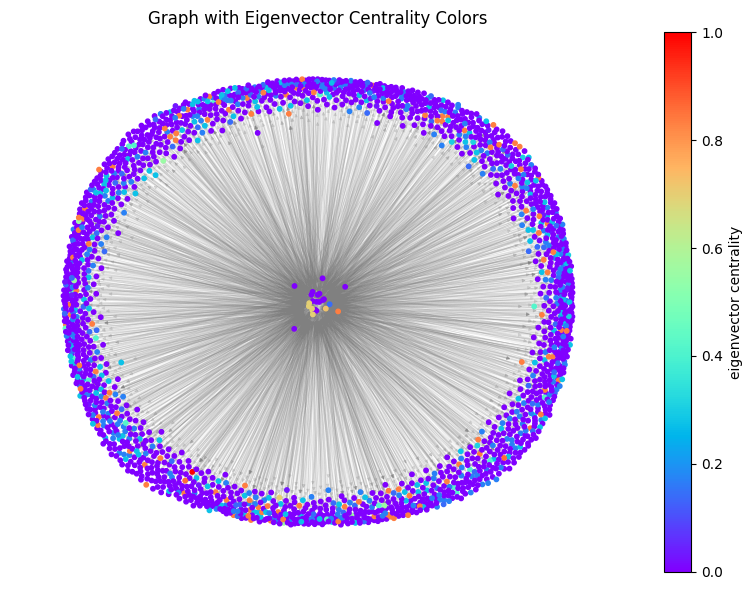

In [35]:
gsub = nx.read_graphml('cna.graphml')


eigenvector_centrality = nx.eigenvector_centrality(gsub)

# Criar uma lista de cores proporcional à centralidade de grau
node_colors = [eigenvector_centrality[node] for node in gsub.nodes]

# Calcular a disposição do grafo com o layout de mola (spring layout)
pos = nx.spring_layout(gsub, k = 0.3)

# Plotar o grafo com as cores dos nós proporcionais
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(gsub, pos, node_color=node_colors, cmap='rainbow', node_size=10)
nx.draw_networkx_edges(gsub, pos, edge_color='gray', alpha=0.1, arrowsize=5, width=0.5)
plt.title("Graph with Eigenvector Centrality Colors")
plt.axis('off')

# Criar uma colorbar personalizada
cmap = plt.cm.ScalarMappable(cmap='rainbow')
cmap.set_array([])
colorbar = plt.colorbar(cmap)
colorbar.set_label('eigenvector centrality')
plt.tight_layout()

plt.savefig('eigenvector_centrality.png',dpi=300)
plt.show()

# REQUISITO 03

In [2]:

#Para não ter que rodar de novo a sessão que faz o grafo, coloquei aqui lendo 
#o arquivo que é mais rápido

Gsub = nx.read_graphml('cna.graphml')


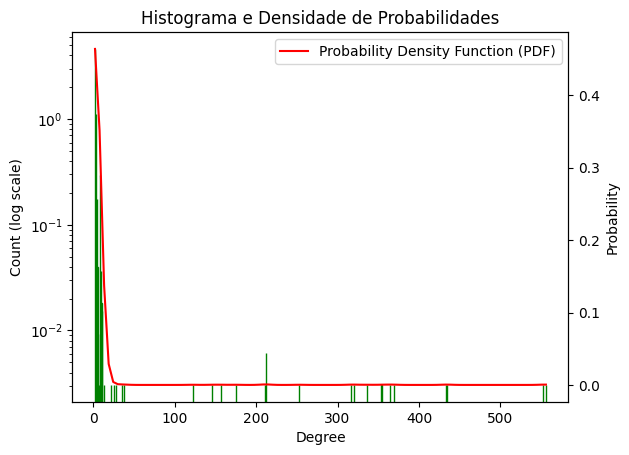

<Figure size 640x480 with 0 Axes>

In [54]:
# Calcular os graus dos nós
degrees = [degree for _, degree in Gsub.degree()]

# Plotar o histograma
plt.hist(degrees, bins='auto', edgecolor='green', density=True, cumulative=False, label='Histograma')
plt.yscale('log')

# Calcular a função de densidade de probabilidades
kde = gaussian_kde(degrees)
x = np.linspace(min(degrees), max(degrees), 100)
y = kde(x)

# Normalizar a função de densidade de probabilidades como porcentagens
y_percent = y / np.sum(y)
# Personalizar os rótulos
plt.title('Histograma e Densidade de Probabilidades')
plt.xlabel('Degree')
plt.ylabel('Count (log scale)')
# Plotar a função de densidade de probabilidades como porcentagens no eixo direito
ax2 = plt.twinx()
ax2.plot(x, y_percent, color='red', label='Probability Density Function (PDF)')

# Personalizar os rótulos dos eixos
ax2.set_ylabel('Probability')

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()

#salvando grafico
plt.savefig('Histograma_PDF.png',dpi=300)








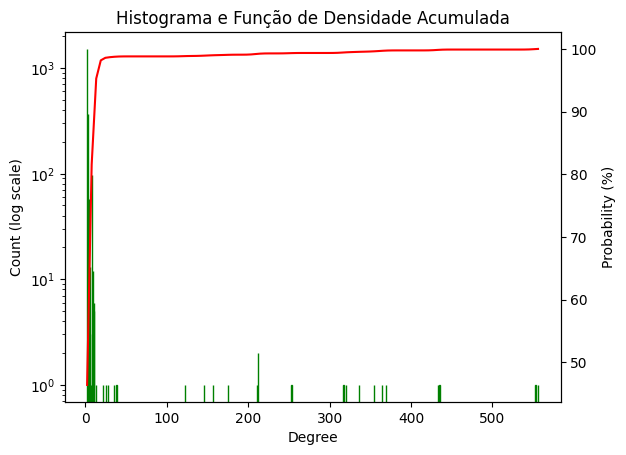

<Figure size 640x480 with 0 Axes>

In [60]:
# Plotar o histograma em escala logarítmica
plt.hist(degrees, bins='auto', edgecolor='green', density=False, cumulative=False, label='Histograma')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Count (log scale)')
plt.title('Histograma e Função de Densidade Acumulada')

# Calcular a função de densidade de probabilidades
kde = gaussian_kde(degrees)
x = np.linspace(min(degrees), max(degrees), 100)
y = kde(x)

# Normalizar a função de densidade de probabilidades como porcentagens
y_percent = y / np.sum(y) * 100

# Calcular a Cumulative Density Function (CDF)
cdf = np.cumsum(y_percent)

# Plotar a Cumulative Density Function (CDF) no eixo direito
ax2 = plt.twinx()
ax2.plot(x, cdf, color='red', label='Cumulative Density Function (CDF)')

# Personalizar os rótulos dos eixos
ax2.set_ylabel('Probability (%)')

# Exibir o gráfico
plt.show()

#salvando grafico
plt.savefig('Histograma_CDF.png',dpi=300)

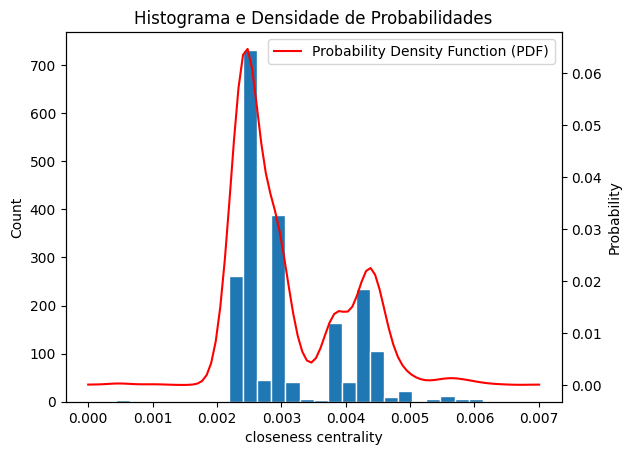

In [4]:
# Plotar o histograma

closeness_centrality = nx.closeness_centrality(Gsub)
node_values = [closeness_centrality[node] for node in Gsub.nodes]
plt.hist(node_values, edgecolor='white', bins='auto', density=False, cumulative=False, label='Histograma')

# Calcular a função de densidade de probabilidades
kde = gaussian_kde(node_values)
x = np.linspace(min(node_values), max(node_values), 100)
y = kde(x)

# Normalizar a função de densidade de probabilidades como porcentagens
y_percent = y / np.sum(y)
# Personalizar os rótulos
plt.title('Histograma e Densidade de Probabilidades')
plt.xlabel('closeness centrality')
plt.ylabel('Count')
# Plotar a função de densidade de probabilidades como porcentagens no eixo direito
ax2 = plt.twinx()
ax2.plot(x, y_percent, color='red', label='Probability Density Function (PDF)')

# Personalizar os rótulos dos eixos
ax2.set_ylabel('Probability')

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()



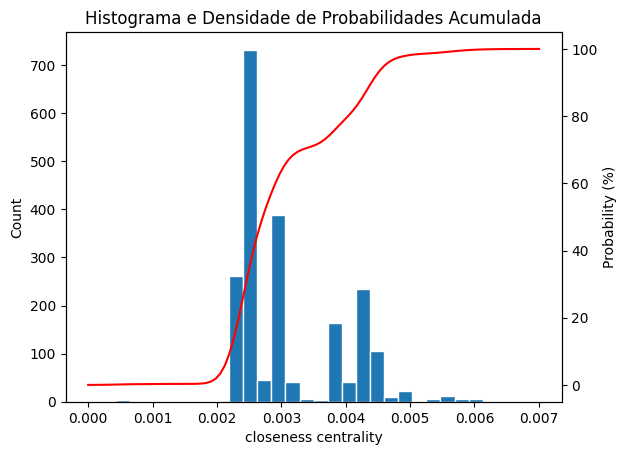

In [6]:
# Plotar o histograma

closeness_centrality = nx.closeness_centrality(Gsub)
node_values = [closeness_centrality[node] for node in Gsub.nodes]
plt.hist(node_values, edgecolor='white', bins='auto', density=False, cumulative=False, label='Histograma')

# Calcular a função de densidade de probabilidades
kde = gaussian_kde(node_values)
x = np.linspace(min(node_values), max(node_values), 100)
y = kde(x)

# Normalizar a função de densidade de probabilidades como porcentagens
y_percent = y / np.sum(y) * 100

# Personalizar os rótulos
plt.title('Histograma e Densidade de Probabilidades Acumulada')
plt.xlabel('closeness centrality')
plt.ylabel('Count')

# Calcular a Cumulative Density Function (CDF)
cdf = np.cumsum(y_percent)

# Plotar a Cumulative Density Function (CDF) no eixo direito
ax2 = plt.twinx()
ax2.plot(x, cdf, color='red', label='Cumulative Density Function (CDF)')

# Personalizar os rótulos dos eixos
ax2.set_ylabel('Probability (%)')

# Exibir o gráfico
plt.show()


# Requisito 04

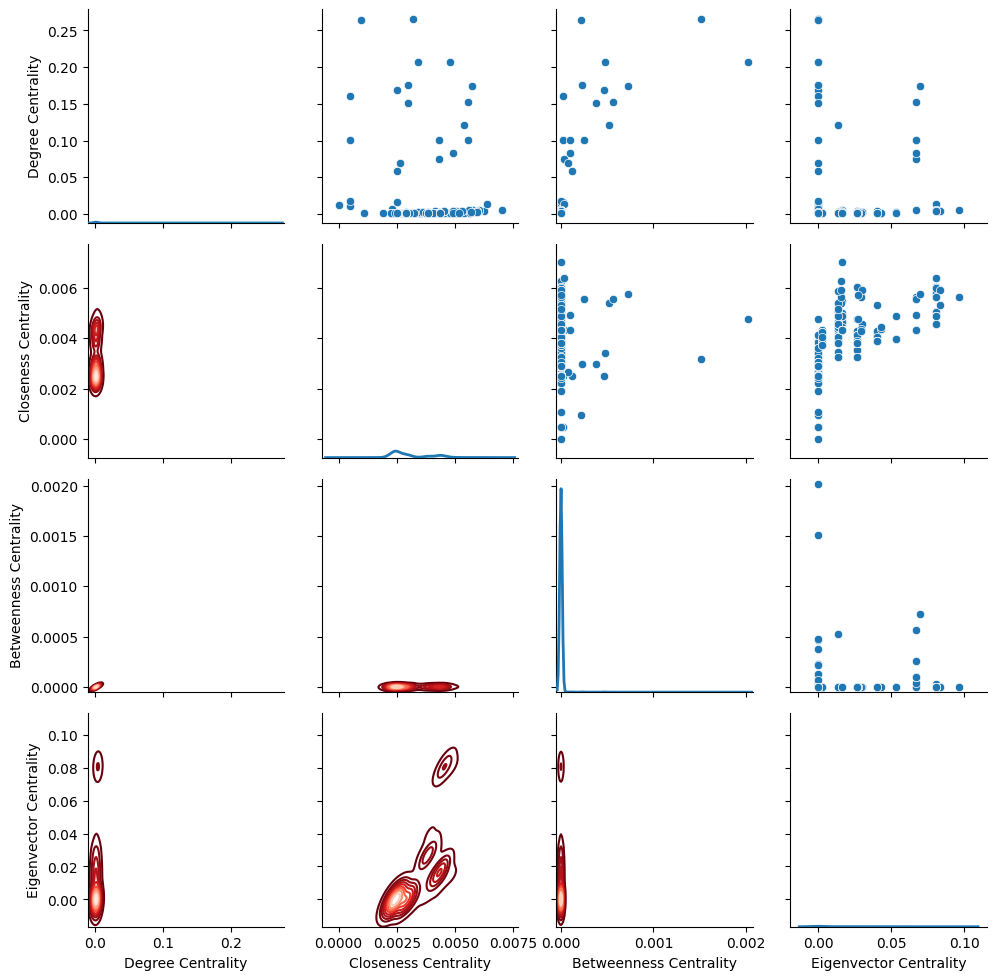

In [31]:
# Criando dataframe
degree_centrality = nx.degree_centrality(Gsub)
degree_centrality_list = [degree_centrality[node] for node in Gsub.nodes]


closeness_centrality = nx.closeness_centrality(Gsub)
closeness_centrality_list = [closeness_centrality[node] for node in Gsub.nodes]

betweenness_centrality = nx.betweenness_centrality(Gsub)
betweenness_centrality_list = [betweenness_centrality[node] for node in Gsub.nodes]

eigenvector_centrality = nx.eigenvector_centrality(Gsub)
eigenvector_centrality_list = [eigenvector_centrality[node] for node in Gsub.nodes]




# Criar o DataFrame a partir das listas
df = pd.DataFrame({'Degree Centrality': degree_centrality_list, 'Closeness Centrality': closeness_centrality_list, 
                   'Betweenness Centrality': betweenness_centrality_list, 'Eigenvector Centrality': eigenvector_centrality_list})

fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap = "Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend =False)

#salvando graficos
plt.savefig('Centrality_Distributions',dpi=300)

# Requisito 05

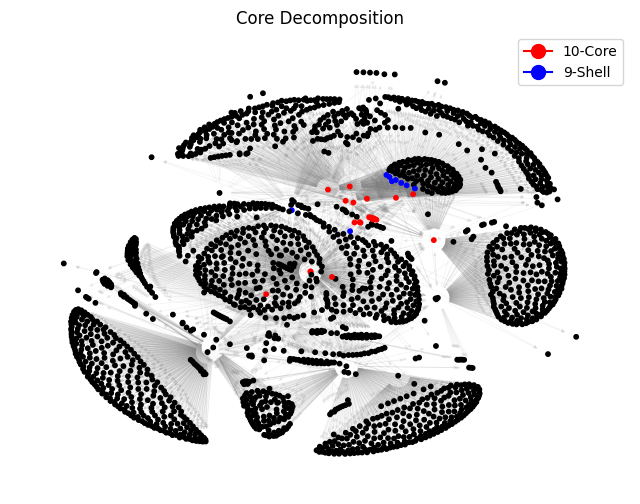

In [22]:
gsub = nx.read_graphml('cna.graphml')


k_core = nx.k_core(gsub, k=10).nodes()
k_shell = nx.k_shell(gsub, k=9).nodes()

# Criar uma lista de cores proporcional à centralidade de grau
node_colors = []
for node in gsub:
    if node in k_core:
        node_colors.append('red')
    elif node in k_shell:
        node_colors.append('blue')
    else:
        node_colors.append('black')

# Calcular a disposição do grafo com o layout de mola (spring layout)
pos = graphviz_layout(gsub)

# Plotar o grafo com as cores dos nós proporcionais
plt.figure(figsize=(8, 6), facecolor='white')
nx.draw_networkx_nodes(gsub, pos, node_color=node_colors, node_size=10)
nx.draw_networkx_edges(gsub, pos, edge_color='gray', alpha=0.1, arrowsize=5, width=0.5)
plt.title("Core Decomposition")
plt.axis('off')

legend_elements =  [Line2D([0], [0], marker='o', color='r', label='10-Core',
                          markerfacecolor='r', markersize=10),
                    Line2D([0], [0], marker='o', color='b', label='9-Shell',
                          markerfacecolor='b', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()